# Data perpration

In [144]:
#https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
#https://www.sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/
#https://blog.csdn.net/Cyrus_May/article/details/113504879

In [145]:
import pandas as pd
import numpy as np
#upload the dataset by downloading both datasets from canvas and upload it on colab

data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


In [146]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset'
print(vectorized_day_dataset)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]


# Data exploration

(288,)


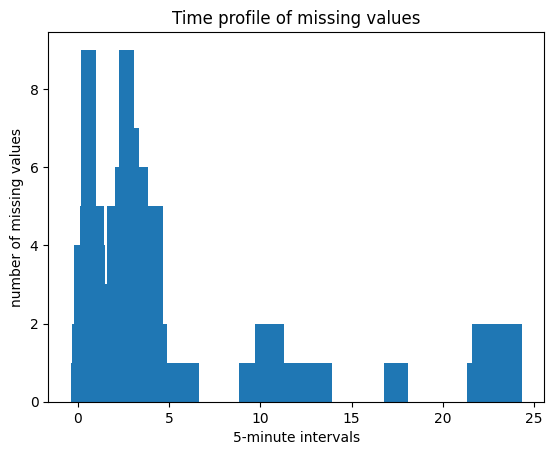

In [147]:
#绘制缺失数据分布图
nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)
print(nans_per_time.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)


ax.set_ylabel('number of missing values')
ax.set_xlabel('5-minute intervals')
ax.set_title('Time profile of missing values')

plt.show()

In [148]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

number of days with missing value 28


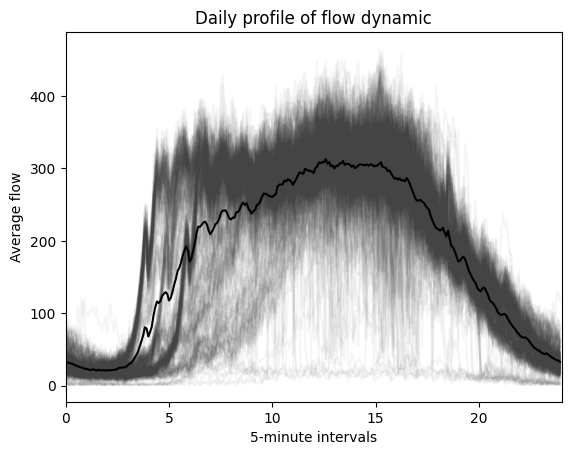

In [149]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()# a convenient way to create a new figure and a set of subplots.
ax.plot(np.array([x_axis_hours,]*ndays).transpose(),vectorized_day_dataset.transpose(),color='#444444',alpha=0.05)
# Above line plots the dataset with specified color and transparency.
ax.plot(x_axis_hours,np.transpose(np.nanmean(vectorized_day_dataset,0)),color='black')
# Above line plots the average of the dataset in black color.

ax.set_ylabel('Average flow')
ax.set_xlabel('5-minute intervals')
plt.xlim(0,24)
ax.set_title('Daily profile of flow dynamic')

plt.show()

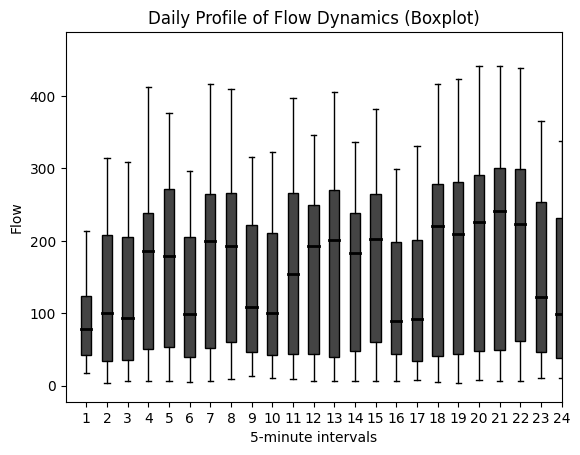

In [150]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()  # This line is a convenient way to create a new figure and a set of subplots.

# Create a boxplot for the dataset
boxplot = ax.boxplot(vectorized_day_dataset.T, patch_artist=True)

# Customize the boxplot appearance
for patch in boxplot['boxes']:
    patch.set_facecolor('#444444')  # Set the box color to gray
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)  # Set median line color to black

# Set the y-axis label
ax.set_ylabel('Flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics (Boxplot)')

# Display the plot
plt.show()

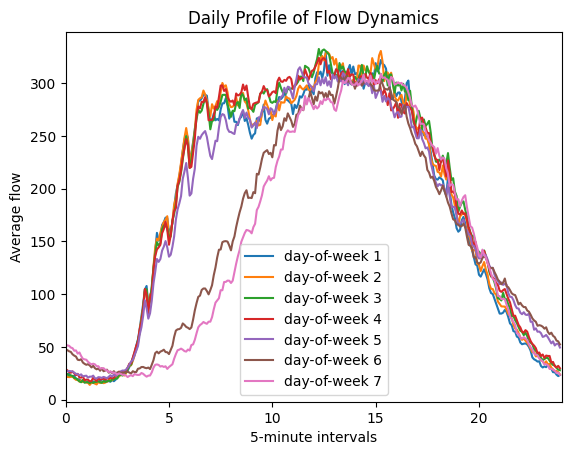

In [151]:
import datetime

# Create an array 'day_of_week' to store the day of the week for each unique date
day_of_week = np.zeros((ndays))

# Loop through each unique date
for i in range(0, ndays):
    # Parse the current date from a string to a datetime object
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')

    # Get the day of the week (1 for Monday, 2 for Tuesday, ..., 7 for Sunday)
    day_of_week[i] = day_dt.isoweekday()


# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Iterate through each day of the week (from 1 to 7)
for i in range(1, 8):
    # Find the indices of days that correspond to the current day of the week
    day_of_week_index_t = np.where(day_of_week == i)

    # Calculate the number of days that match the current day of the week
    ndays_t = np.size(day_of_week_index_t[0])

    # Plot the average flow for the current day of the week
    ax.plot(x_axis_hours,
            np.nanmean(vectorized_day_dataset[day_of_week_index_t[0], :].transpose(), 1),
            label='day-of-week ' + str(i))
    # This line plots the average flow for the current day of the week.
    # 'np.nanmean()' calculates the mean while handling NaN values.

# Set the y-axis label
ax.set_ylabel('Average flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics')

# Add a legend indicating the day of the week
ax.legend()

# Display the plot
plt.show()

# Part 2: Clustering and Parameter Evaluation
Model : K-Means


In [152]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

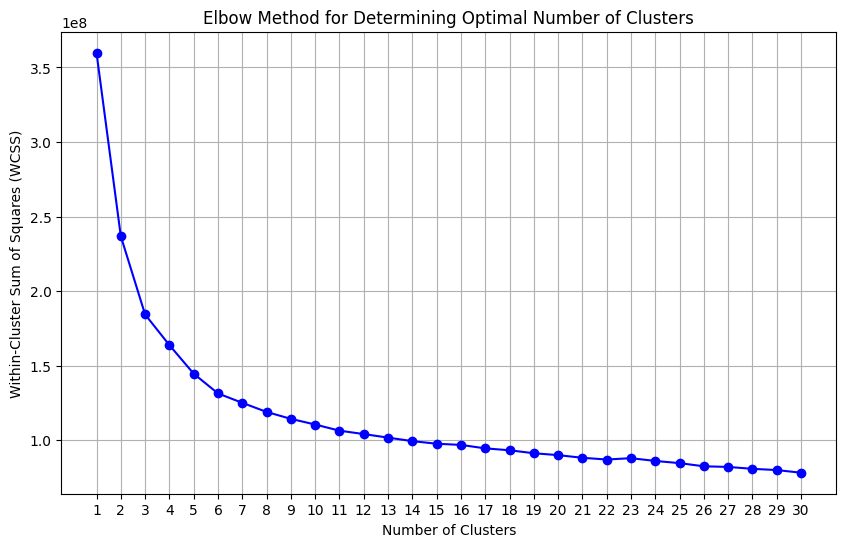

In [153]:
import matplotlib.pyplot as plt


n_clusters_options = range(1, 31)

wcss = []

for n_clusters in n_clusters_options:
    model = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
    model.fit(vectorized_day_dataset_no_nans)
    wcss.append(model.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(n_clusters_options, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(n_clusters_options)
plt.grid(True)
plt.show()

In [154]:
n_clusters_options = [5, 6, 7, 8, 9, 10, 11, 12]
init_options = ['k-means++', 'random']
n_init_options = [10, 20]

scores = []
params = []


for n_clusters in n_clusters_options:
    for init in init_options:
        for n_init in n_init_options:
            model = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=0)
            labels = model.fit_predict(vectorized_day_dataset_no_nans)


            silhouette = silhouette_score(vectorized_day_dataset_no_nans, labels)
            davies = davies_bouldin_score(vectorized_day_dataset_no_nans, labels)
            calinski = calinski_harabasz_score(vectorized_day_dataset_no_nans, labels)


            scores.append([silhouette, 1/davies, calinski])
            params.append({'n_clusters': n_clusters, 'init': init, 'n_init': n_init})


scores = np.array(scores)
scaler = StandardScaler()
standardized_scores = scaler.fit_transform(scores)
combined_scores = standardized_scores.sum(axis=1)


best_index = np.argmax(combined_scores)
best_params = params[best_index]

print(f"Best parameters: {best_params}, with combined score: {combined_scores[best_index]}")


final_clusters_KM = KMeans(**best_params, random_state=0).fit(vectorized_day_dataset_no_nans)
final_labels_KM = final_clusters_KM.labels_
print("Final cluster labels:", final_labels_KM)

Best parameters: {'n_clusters': 5, 'init': 'random', 'n_init': 20}, with combined score: 5.926974822530356
Final cluster labels: [3 3 3 1 1 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 0 0 3 3 0 0 0 0 3 3 0 1 0 0 0 3 3
 0 0 0 0 0 3 3 0 0 0 0 3 3 0 0 0 0 3 3 0 0 0 0 0 3 3 0 0 0 0 0 3 3 0 0 0 0
 0 3 3 0 0 0 0 0 3 0 0 3 3 3 3 0 0 0 0 3 3 0 0 0 0 0 3 3 0 0 0 0 0 3 3 0 0
 0 0 0 3 1 2 2 2 2 2 1 1 2 2 2 1 2 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1
 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 3 1 2 2 2 2 2 1 4 2 2 2 1 1 2 2 2 2
 2 1 1 2 1 2 1 1 1 1 2 1 1 1 2 2 2 4 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2
 2 2 1 1 2 2 2 2 2 1 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 4 2 2 2 1 1
 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 3 1 2 2 2 2 1 1 2 2 2 2 2
 1 1 2 0 2 2 2 1 3 2 2 2 0 0 3 3 2 2 2 0 1 3 2 2 2 2 2 1 3 2 2 0 1 3 3 3 1
 1 1 1 3]


Model : AgglomerativeClustering


In [155]:

n_clusters_options = [5, 6, 7, 8, 9, 10, 11, 12]
linkage_options = ['ward', 'complete', 'average', 'single']
metric_options = ['euclidean', 'manhattan', 'cosine', 'hamming']

scores = []
params = []


for n_clusters in n_clusters_options:
    for linkage in linkage_options:
        for metric in metric_options:
            if linkage == 'ward' and metric != 'euclidean':
                continue
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
            labels = model.fit_predict(vectorized_day_dataset_no_nans)


            silhouette = silhouette_score(vectorized_day_dataset_no_nans, labels)
            davies = davies_bouldin_score(vectorized_day_dataset_no_nans, labels)
            calinski = calinski_harabasz_score(vectorized_day_dataset_no_nans, labels)


            scores.append([silhouette, 1/davies, calinski])
            params.append({'n_clusters': n_clusters, 'linkage': linkage, 'metric': metric})


scores = np.array(scores)
scaler = StandardScaler()
standardized_scores = scaler.fit_transform(scores)
combined_scores = standardized_scores.sum(axis=1)


best_index = np.argmax(combined_scores)
best_params = params[best_index]

print(f"Best parameters: {best_params}, with combined score: {combined_scores[best_index]}")


final_clusters = AgglomerativeClustering(**best_params).fit(vectorized_day_dataset_no_nans)
final_labels_AGG = final_clusters.labels_
print("Final cluster labels:", final_labels_AGG)

Best parameters: {'n_clusters': 5, 'linkage': 'ward', 'metric': 'euclidean'}, with combined score: 2.7166829785605886
Final cluster labels: [2 2 2 1 3 2 3 3 2 2 1 3 3 3 3 2 2 3 3 3 3 3 2 2 3 3 1 3 2 2 3 1 3 3 3 2 2
 3 3 3 3 3 2 2 3 3 3 3 2 2 3 3 3 3 2 2 3 3 3 3 1 2 2 3 3 3 1 3 2 2 3 3 3 3
 3 2 2 3 3 3 3 3 2 3 3 2 2 2 2 3 3 3 3 2 2 3 3 3 3 3 2 2 3 3 3 3 3 2 2 3 3
 3 3 3 2 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 2 1 0 0 0 0 0 1 4 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 4 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 2 1 0 0 0 0 1 1 0 0 0 0 0
 1 2 0 0 0 0 0 1 2 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 1 2 2 2 1
 1 1 1 2]


Model：DBSCAN

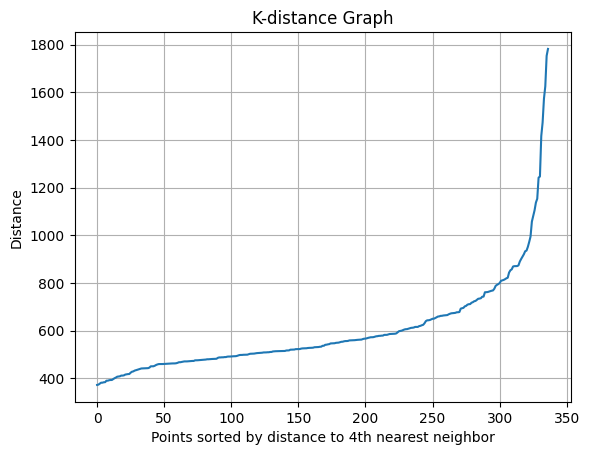

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors


neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(vectorized_day_dataset_no_nans)
distances, indices = neighbors_fit.kneighbors(vectorized_day_dataset_no_nans)


distances = np.sort(distances[:, 3], axis=0)


plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted by distance to 4th nearest neighbor")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [157]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np


vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0], :]
days_not_nans = days[np.where(nans_per_day == 0)[0]]


eps_options = np.arange(400, 600, 50)
min_samples_options = range(3, 5)

scores = []
params = []


for eps in eps_options:
    for min_samples in min_samples_options:

        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(vectorized_day_dataset_no_nans)


        unique_labels = np.unique(labels)
        if len(unique_labels) > 1 and len(unique_labels) < len(vectorized_day_dataset_no_nans):

            if len(unique_labels) > 1:
                silhouette = silhouette_score(vectorized_day_dataset_no_nans, labels)
                scores.append(silhouette)
                params.append({'eps': eps, 'min_samples': min_samples})
            else:
                scores.append(-1)
                params.append({'eps': eps, 'min_samples': min_samples})
        else:
            scores.append(-1)
            params.append({'eps': eps, 'min_samples': min_samples})


best_index = np.argmax(scores)
best_params = params[best_index]
best_score = scores[best_index]

print(f"Best parameters: {best_params}, Best Silhouette Score: {best_score}")


final_model = DBSCAN(**best_params)
final_labels_DBSCAN = final_model.fit_predict(vectorized_day_dataset_no_nans)

print("final lables:", final_labels_DBSCAN)

Best parameters: {'eps': 500, 'min_samples': 3}, Best Silhouette Score: -0.02772100330028316
final lables: [-1  0  0 -1  1  0  1  1  0  0 -1 -1 -1 -1 -1  0  0  1 -1  1  1  1  0  0
 -1 -1 -1  1  0  0 -1 -1 -1 -1 -1  0  0  1  1  1 -1  1  0  0  1  1  1 -1
  0  0  1 -1 -1 -1  0  0  1  1 -1  1 -1  0  0  1 -1  1 -1  1  0  0  1  1
  1 -1  1  0  0  1 -1 -1 -1  1  0 -1 -1 -1  0  0  0 -1  1  1 -1  0  0 -1
  1  1 -1  1  0  0  1 -1  1  1 -1  0  0 -1  1 -1 -1 -1  0  2  3  3  3 -1
 -1  2  2 -1 -1 -1 -1  4  2  2 -1 -1  2  2 -1  3  3  3 -1  2  2 -1 -1 -1
  3 -1 -1  2  3  3 -1 -1 -1 -1  2 -1 -1  3  3 -1  2  2  3 -1 -1  3 -1 -1
  2 -1 -1 -1 -1 -1  2 -1 -1 -1  4  2  2  4  4 -1  4  4  2  2  4 -1  4  4
  4  2  2  4 -1  2  2  4 -1  4 -1  2  2 -1 -1 -1  4 -1 -1  2  3 -1 -1 -1
 -1  2 -1 -1  3 -1 -1 -1 -1  2  3  3  3 -1 -1 -1  3  2  2  3  3 -1  3 -1
  2  2  3  3 -1 -1 -1  2 -1 -1  3 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  3  3 -1
 -1 -1 -1  3  3 -1 -1  2 -1 -1 -1  3  3  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -

Model： GaussianMixture

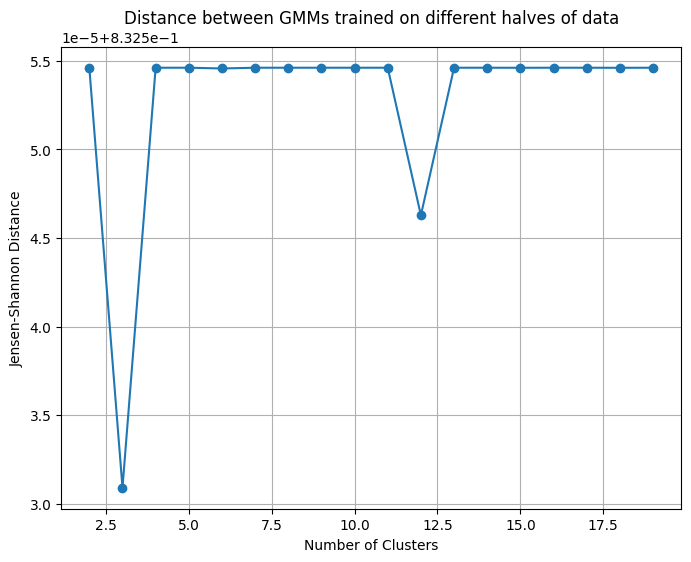

In [158]:
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt


data = vectorized_day_dataset_no_nans
np.random.shuffle(data)
split_index = len(data) // 2
data_1, data_2 = data[:split_index], data[split_index:]


def js_distance_between_gmms(gmm1, gmm2, n_samples=1000):

    samples_1 = gmm1.sample(n_samples)[0]
    samples_2 = gmm2.sample(n_samples)[0]


    log_scores_1_gmm1 = gmm1.score_samples(samples_1)
    log_scores_1_gmm2 = gmm2.score_samples(samples_1)

    log_scores_2_gmm1 = gmm1.score_samples(samples_2)
    log_scores_2_gmm2 = gmm2.score_samples(samples_2)


    scores_1 = np.exp(log_scores_1_gmm1 - np.max(log_scores_1_gmm1)) + np.exp(log_scores_1_gmm2 - np.max(log_scores_1_gmm2))
    scores_2 = np.exp(log_scores_2_gmm1 - np.max(log_scores_2_gmm1)) + np.exp(log_scores_2_gmm2 - np.max(log_scores_2_gmm2))


    scores_1 /= np.sum(scores_1)
    scores_2 /= np.sum(scores_2)


    return jensenshannon(scores_1, scores_2)


js_distances = []
cluster_range = range(2, 20)
for n_clusters in cluster_range:

    gmm1 = GaussianMixture(n_components=n_clusters).fit(data_1)
    gmm2 = GaussianMixture(n_components=n_clusters).fit(data_2)


    js_distance = js_distance_between_gmms(gmm1, gmm2)
    js_distances.append(js_distance)


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, js_distances, marker='o')
plt.title('Distance between GMMs trained on different halves of data')
plt.xlabel('Number of Clusters')
plt.ylabel('Jensen-Shannon Distance')
plt.grid(True)
plt.show()

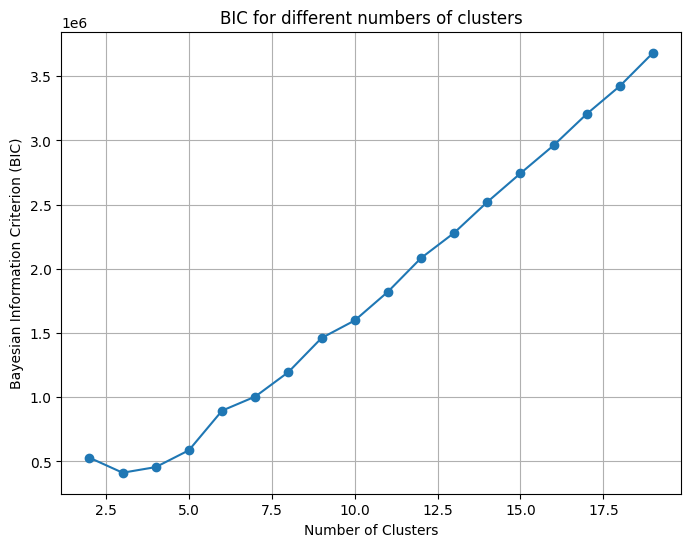

In [159]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


data = vectorized_day_dataset_no_nans


bic_values = []
cluster_range = range(2, 20)
for n_clusters in cluster_range:

    gmm = GaussianMixture(n_components=n_clusters).fit(data)


    bic = gmm.bic(data)
    bic_values.append(bic)


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, bic_values, marker='o')
plt.title('BIC for different numbers of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Bayesian Information Criterion (BIC)')
plt.grid(True)
plt.show()


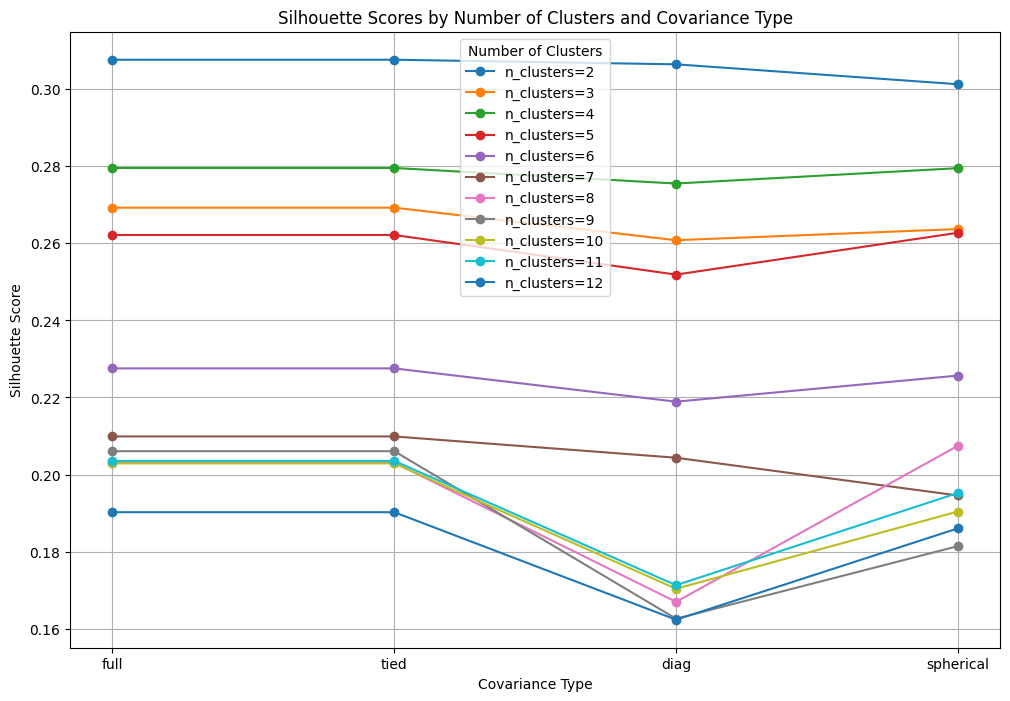

In [160]:
import matplotlib.pyplot as plt



n_clusters_options = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
covariance_type_options = ['full', 'tied', 'diag', 'spherical']


silhouette_scores = {n: [] for n in n_clusters_options}
covariance_labels = []


for n_clusters in n_clusters_options:
    for covariance_type in covariance_type_options:
        model = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, random_state=42)
        labels = model.fit_predict(vectorized_day_dataset_no_nans)


        silhouette = silhouette_score(vectorized_day_dataset_no_nans, labels)


        silhouette_scores[n_clusters].append(silhouette)
        if n_clusters == n_clusters_options[0]:
            covariance_labels.append(covariance_type)


plt.figure(figsize=(12, 8))
for n_clusters, scores in silhouette_scores.items():
    plt.plot(covariance_labels, scores, marker='o', label=f'n_clusters={n_clusters}')

plt.title('Silhouette Scores by Number of Clusters and Covariance Type')
plt.xlabel('Covariance Type')
plt.ylabel('Silhouette Score')
plt.legend(title="Number of Clusters")
plt.grid(True)
plt.show()

In [161]:
n_clusters_options = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
covariance_type_options = ['full', 'tied', 'diag']

silhouette_scores = []
params = []


for n_clusters in n_clusters_options:
    for covariance_type in covariance_type_options:
        model = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, random_state=42)
        labels = model.fit_predict(vectorized_day_dataset_no_nans)


        silhouette = silhouette_score(vectorized_day_dataset_no_nans, labels)


        silhouette_scores.append(silhouette)
        params.append({'n_components': n_clusters, 'covariance_type': covariance_type})


best_index = np.argmax(silhouette_scores)
best_params = params[best_index]

print(f"Best parameters: {best_params}, with silhouette score: {silhouette_scores[best_index]}")


final_model = GaussianMixture(**best_params, random_state=42).fit(vectorized_day_dataset_no_nans)
final_labels_Gaussian = final_model.predict(vectorized_day_dataset_no_nans)
print("Final cluster labels:", final_labels_Gaussian)

Best parameters: {'n_components': 4, 'covariance_type': 'full'}, with silhouette score: 0.27953821853532274
Final cluster labels: [2 2 1 2 2 2 0 1 1 1 0 2 2 0 0 0 1 1 1 2 0 1 1 0 0 1 0 2 1 2 0 0 0 2 0 0 2
 1 1 0 0 1 1 1 1 1 0 2 0 2 0 2 1 1 0 0 2 2 1 0 0 0 1 0 2 1 0 2 1 0 2 1 1 1
 1 0 0 2 1 1 1 1 0 2 1 1 1 1 0 1 2 1 1 1 0 2 0 1 0 0 1 0 2 1 0 1 1 1 0 0 1
 1 0 2 1 1 2 0 0 2 0 0 1 1 0 2 0 2 1 0 0 1 2 0 1 0 1 0 1 0 1 0 1 0 0 2 0 2
 1 1 0 0 0 1 1 1 0 1 2 1 1 1 2 0 2 2 2 2 1 0 1 2 0 1 2 2 2 1 2 2 0 1 2 2 1
 0 0 2 2 1 1 0 0 0 0 1 0 2 1 2 0 0 3 1 0 0 1 2 0 2 0 2 2 1 1 0 0 1 1 2 2 0
 1 1 1 2 0 0 0 1 0 0 1 0 1 0 0 2 1 2 0 2 0 3 0 1 2 1 0 1 0 2 2 2 1 1 1 1 0
 0 1 0 0 0 2 2 0 1 2 0 2 0 0 0 0 1 0 0 1 2 0 1 0 0 0 0 2 0 0 2 0 0 2 1 0 3
 0 2 2 1 1 0 0 1 0 1 1 1 0 2 0 1 2 2 2 2 0 2 1 1 1 1 2 1 0 2 0 2 1 0 1 0 2
 2 1 0 0]


# Clustering Evaluation

In [162]:
# Read the evaluation dataset from a CSV file
data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")

# Sort the evaluation DataFrame by columns "Date" and "Interval_5"
data_eval_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted evaluation DataFrame
days_eval = np.unique(data_eval_df[['Date']].values.ravel())
# Calculate the total number of unique days in the evaluation dataset
ndays_eval = len(days_eval)

# Group the evaluation DataFrame by the "Date" column
day_eval_subsets_df = data_eval_df.groupby(["Date"])

# Initialize a matrix 'vectorized_day_dataset_eval' filled with NaN values
vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
vectorized_day_dataset_eval.fill(np.nan)
# This section initializes a 2D array to store the evaluation dataset and fills it with NaN values.

# Loop through each unique day in the evaluation dataset
for i in range(0, ndays_eval):
    # Get the DataFrame corresponding to the current day
    df_t = day_eval_subsets_df.get_group(days_eval[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame (this line is redundant)
        df_t = day_eval_subsets_df.get_group(days_eval[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset_eval'
        vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset_eval'
print(vectorized_day_dataset_eval)

[[35. 29. 32. ... 62. 66. 71.]
 [44. 44. 51. ... 30. 31. 23.]
 [21. 22. 17. ... 20. 22. 22.]
 ...
 [17. 17. 20. ... 35. 25. 27.]
 [37. 25. 30. ... 37. 36. 49.]
 [42. 28. 32. ... 45. 49. 38.]]


In [171]:
# Calculate the total number of NaN values in the evaluation dataset
print('Number of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)))

# Calculate the rate of NaN values in the evaluation dataset
print('Rate of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)) / (ndays_eval * nintvals))

# Calculate the number of days with missing values
nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)
print('Number of days with missing values:', np.size(np.where(nans_per_day_eval > 0)))

# Filter out days with no missing values and create a new dataset
vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]

# Calculate the final number of days in the evaluation dataset after removing missing values
print('Final number of days in evaluation dataset:', len(days_not_nans_eval))

# Print the list of days in the evaluation dataset with no missing values
print('List of days without missing values:', days_not_nans_eval)

# Calculate the total number of days in the filtered evaluation dataset
ndays_eval_not_nans = len(days_not_nans_eval)

Number of NaNs: 96
Rate of NaNs: 0.004166666666666667
Number of days with missing values: 11
Final number of days in evaluation dataset: 69
List of days without missing values: [20220108 20220109 20220131 20220204 20220209 20220210 20220211 20220223
 20220226 20220227 20220302 20220304 20220305 20220306 20220310 20220314
 20220315 20220321 20220323 20220326 20220403 20220406 20220416 20220418
 20220421 20220422 20220425 20220427 20220428 20220503 20220505 20220514
 20220519 20220521 20220522 20220526 20220530 20220601 20220603 20220609
 20220616 20220619 20220623 20220628 20220704 20220711 20220712 20220904
 20220910 20220911 20220920 20220921 20220925 20220927 20220929 20220930
 20221005 20221022 20221024 20221114 20221116 20221121 20221122 20221213
 20221216 20221218 20221220 20221223 20221230]


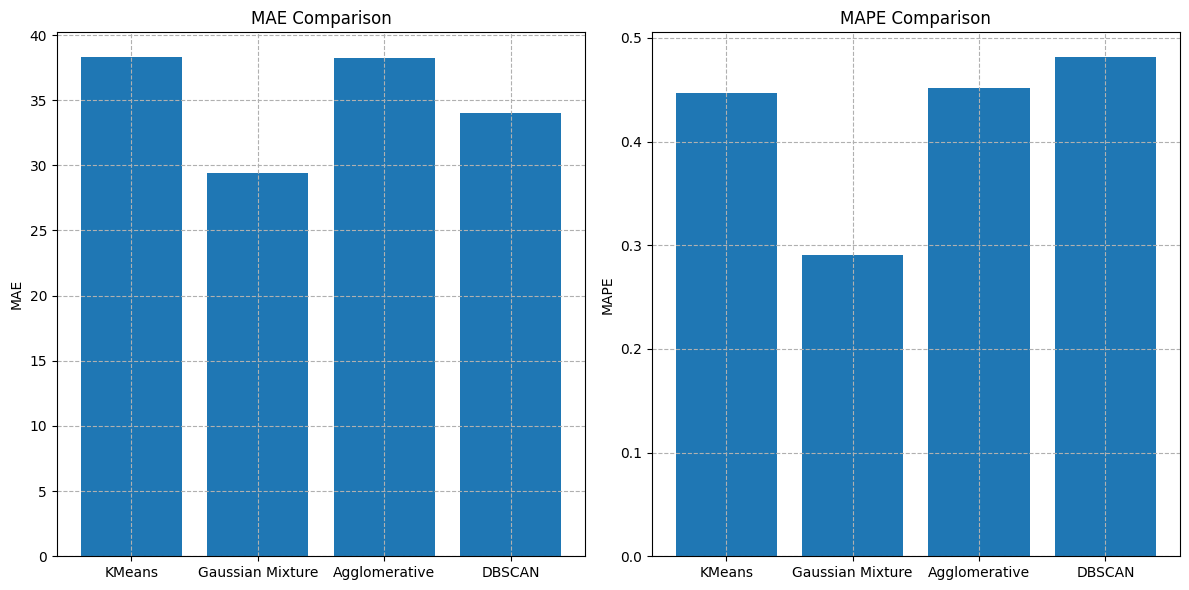

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances


def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None

    for i in range(len(centroids)):
        ed_t = pairwise_distances(centroids[i], new_day, metric='euclidean')
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid


def compute_centroids(cluster_labels, n_clusters, data):
    centroids = []
    for i in range(n_clusters):
        centroid = np.nanmean(data[np.where(cluster_labels == i)[0], :], axis=0).reshape(1, -1)
        centroids.append(centroid)
    return centroids

def evaluate_model(centroids, cluster_labels, data_eval, n_past_intervals_for_classification, nintvals):
    total_mae = 0
    total_mape = 0
    prediction_counts = 0

    for i in range(data_eval.shape[0]):
        for j in range(n_past_intervals_for_classification, nintvals - 2):  # Ensure no out-of-bounds for j+1
            centroid_index = find_the_closest_centroid(centroids, data_eval[i].reshape(1, -1), j - n_past_intervals_for_classification, j)
            predicted_value = centroids[centroid_index][0, j + 1]

            mae_t = abs(predicted_value - data_eval[i][j + 1])
            mape_t = abs(predicted_value - data_eval[i][j + 1]) / float(data_eval[i][j + 1])

            total_mae += mae_t
            total_mape += mape_t
            prediction_counts += 1

    mae_avg = total_mae / prediction_counts
    mape_avg = total_mape / prediction_counts
    return mae_avg, mape_avg




n_clusters_gaussian =4
n_clusters_agg =5
n_clusters_kmeans =5

nintvals = vectorized_day_dataset_no_nans_eval.shape[1]
n_past_intervals_for_classification = 5


centroids_kmeans = compute_centroids(final_labels_KM, n_clusters_kmeans, vectorized_day_dataset_no_nans)
mae_kmeans, mape_kmeans = evaluate_model(centroids_kmeans, final_labels_KM, vectorized_day_dataset_no_nans_eval, n_past_intervals_for_classification, nintvals)


centroids_gaussian = compute_centroids(final_labels_Gaussian, n_clusters_gaussian, vectorized_day_dataset_no_nans)
mae_gaussian, mape_gaussian = evaluate_model(centroids_gaussian, final_labels_Gaussian, vectorized_day_dataset_no_nans_eval, n_past_intervals_for_classification, nintvals)


centroids_agg = compute_centroids(final_labels_AGG, n_clusters_agg, vectorized_day_dataset_no_nans)
mae_agg, mape_agg = evaluate_model(centroids_agg, final_labels_AGG, vectorized_day_dataset_no_nans_eval, n_past_intervals_for_classification, nintvals)


unique_labels_dbscan = np.unique(final_labels_DBSCAN[final_labels_DBSCAN != -1])
centroids_dbscan = compute_centroids(final_labels_DBSCAN, len(unique_labels_dbscan), vectorized_day_dataset_no_nans)
mae_dbscan, mape_dbscan = evaluate_model(centroids_dbscan, final_labels_DBSCAN, vectorized_day_dataset_no_nans_eval, n_past_intervals_for_classification, nintvals)

models = ['KMeans', 'Gaussian Mixture', 'Agglomerative', 'DBSCAN']
mae_scores = [mae_kmeans, mae_gaussian, mae_agg, mae_dbscan]
mape_scores = [mape_kmeans, mape_gaussian, mape_agg, mape_dbscan]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot MAE
ax[0].bar(models, mae_scores)
ax[0].set_title('MAE Comparison')
ax[0].set_ylabel('MAE')
ax[0].grid(True, linestyle='--')

# Plot MAPE
ax[1].bar(models, mape_scores)
ax[1].set_title('MAPE Comparison')
ax[1].set_ylabel('MAPE')
ax[1].grid(True, linestyle='--')

plt.tight_layout()
plt.show()